## Import Libraries

In [3]:
!pip install kaggle

In [14]:
from google.colab import files
files.upload()

Saving gender_submission.csv to gender_submission.csv


{'gender_submission.csv': b'PassengerId,Survived\r\n892,0\r\n893,1\r\n894,0\r\n895,0\r\n896,1\r\n897,0\r\n898,1\r\n899,0\r\n900,1\r\n901,0\r\n902,0\r\n903,0\r\n904,1\r\n905,0\r\n906,1\r\n907,1\r\n908,0\r\n909,0\r\n910,1\r\n911,1\r\n912,0\r\n913,0\r\n914,1\r\n915,0\r\n916,1\r\n917,0\r\n918,1\r\n919,0\r\n920,0\r\n921,0\r\n922,0\r\n923,0\r\n924,1\r\n925,1\r\n926,0\r\n927,0\r\n928,1\r\n929,1\r\n930,0\r\n931,0\r\n932,0\r\n933,0\r\n934,0\r\n935,1\r\n936,1\r\n937,0\r\n938,0\r\n939,0\r\n940,1\r\n941,1\r\n942,0\r\n943,0\r\n944,1\r\n945,1\r\n946,0\r\n947,0\r\n948,0\r\n949,0\r\n950,0\r\n951,1\r\n952,0\r\n953,0\r\n954,0\r\n955,1\r\n956,0\r\n957,1\r\n958,1\r\n959,0\r\n960,0\r\n961,1\r\n962,1\r\n963,0\r\n964,1\r\n965,0\r\n966,1\r\n967,0\r\n968,0\r\n969,1\r\n970,0\r\n971,1\r\n972,0\r\n973,0\r\n974,0\r\n975,0\r\n976,0\r\n977,0\r\n978,1\r\n979,1\r\n980,1\r\n981,0\r\n982,1\r\n983,0\r\n984,1\r\n985,0\r\n986,0\r\n987,0\r\n988,1\r\n989,0\r\n990,1\r\n991,0\r\n992,1\r\n993,0\r\n994,0\r\n995,0\r\n996,1\r\n997

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import (
    ensemble,
    model_selection,    
    preprocessing,
    tree,
)
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC,
)
from yellowbrick.model_selection import (
    LearningCurve,
)

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
train = pd.read_csv("/content/train.csv")

In [3]:
train.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

## Read the data from the URL

In [4]:
orig_df = train.copy()

In [5]:
orig_df .dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Update pandas_profiling package

In [24]:
!pip install pandas_profiling -U

     |████████████████████████████████| 256kB 7.5MB/s 
     |████████████████████████████████| 112kB 13.2MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 3.1MB 12.9MB/s 
     |████████████████████████████████| 10.1MB 37.9MB/s 
     |████████████████████████████████| 645kB 38.9MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
     |████████████████████████████████| 1.1MB 38.7MB/s 
     |████████████████████████████████| 296kB 55.0MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=2b73ba02a022a20c7ef2100950b93ab26a2e9c1c7ef195f08d3351741231280d
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=03dd0d1f013b4c387d869a4a87e1c063e7a0b72cea1d32e980d46cde9d4d6556
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85

In [8]:
pandas_profiling.__version__

'3.0.0'

In [7]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [71]:
df = train.copy()

In [53]:
df.shape

(891, 12)

In [11]:
df.describe().iloc[:, :2]

PassengerId    Survived
count   891.000000  891.000000
mean    446.000000    0.383838
std     257.353842    0.486592
min       1.000000    0.000000
25%     223.500000    0.000000
50%     446.000000    0.000000
75%     668.500000    1.000000
max     891.000000    1.000000

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.isnull().sum(axis=1).loc[:10]

0     1
1     0
2     1
3     0
4     1
5     2
6     0
7     1
8     1
9     1
10    0
dtype: int64

In [14]:
mask = df.isnull().any(axis=1)

In [15]:
mask.head()  # rows

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [21]:
df[mask].Age.head()

0    22.0
2    26.0
4    35.0
5     NaN
7     2.0
Name: Age, dtype: float64

In [22]:
df.Cabin.value_counts(dropna=False)

NaN            687
C23 C25 C27      4
B96 B98          4
G6               4
E101             3
              ... 
D21              1
A5               1
C128             1
C62 C64          1
D10 D12          1
Name: Cabin, Length: 148, dtype: int64

In [20]:
df.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [23]:
name = df.Name
name.head(3)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
Name: Name, dtype: object

In [39]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
df.isnull().sum()[df.isnull().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [38]:
df['Embarked'].mode()[0]

'S'

In [72]:
df = df.drop(
    columns=[
        "Name","Cabin","Ticket",
    ],axis=1
)

## Manual Imputation of missing values

In [41]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [55]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [73]:
df = pd.get_dummies(df)

In [74]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
df = df.drop(columns="sex_male")

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [58]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [59]:
y = df.Survived
X = df.drop(columns="Survived")

## pyjanitor is a Python implementation of the R package janitor, and provides a clean API for cleaning data.

Why janitor?

Current functionality includes:

Cleaning columns name (multi-indexes are possible!)

Removing empty rows and columns

Identifying duplicate entries

Encoding columns as categorical

Splitting your data into features and targets (for machine learning)

Adding, removing, and renaming columns
Coalesce multiple columns into a single column

Date conversions (from matlab, excel, unix) to Python datetime format
Expand a single column that has delimited, categorical values into dummy-encoded variables

Concatenating and deconcatenating columns, based on a delimiter

Syntactic sugar for filtering the dataframe based on queries on a column

Experimental submodules for finance, biology, chemistry, engineering, and pyspark

In [47]:
! pip install pyjanitor

     |████████████████████████████████| 102kB 6.6MB/s 


In [75]:
import janitor as jn
X, y = jn.get_features_targets(
    df, target_columns="Survived"
)

In [76]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [77]:
X.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## Impute Missing values in the training set

In [78]:
X.isnull().sum()[X.isnull().sum() > 0]

Age    177
dtype: int64

In [81]:
from sklearn.experimental import (
    enable_iterative_imputer,
)
from sklearn import impute
num_cols = [
     "Age",
    "SibSp",
    "Parch",
   ]

In [82]:
imputer = impute.IterativeImputer()
imputed = imputer.fit_transform(
    X_train[num_cols]
)
X_train.loc[:, num_cols] = imputed
imputed = imputer.transform(X_test[num_cols])
X_test.loc[:, num_cols] = imputed

In [83]:
X.isnull().sum()

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [84]:
meds = X_train.median()
X_train = X_train.fillna(meds)
X_test = X_test.fillna(meds)

In [85]:
X.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [86]:
X_train.drop('PassengerId',axis=1,inplace=True)
X_test.drop('PassengerId',axis=1,inplace=True)

In [88]:
cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_female', 'Sex_male', 'Embarked_C',
   'Embarked_Q', 'Embarked_S']
sca = preprocessing.StandardScaler()
X_train = sca.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=cols)
X_test = sca.transform(X_test)
X_test = pd.DataFrame(X_test, columns=cols)

## Code Refactoring

In [89]:
def tweak_titanic(df):
    df = df.drop(
        columns=["Name","Cabin","Ticket","PassengerId",
        ]
    ).pipe(pd.get_dummies, drop_first=True)
    return df

In [90]:
def get_train_test_X_y(
    df, y_col, size=0.3, std_cols=None
):
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=size, random_state=42
    )
    cols = X.columns
    num_cols = [
        "Pclass",
        "Age",
        "SibSp",
        "Parch",
        "Fare",
    ]
    fi = impute.IterativeImputer()
    fitted = fi.fit_transform(X_train[num_cols])
    X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(num_cols)})
    test_fit = fi.transform(X_test[num_cols])
    X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(num_cols)})
    if std_cols:
        std = preprocessing.StandardScaler()
        fitted = std.fit_transform(X_train[std_cols])
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        test_fit = std.transform(X_test[std_cols])
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

In [91]:
orig_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [94]:
ti_df = tweak_titanic(orig_df)
std_cols = "Pclass,Age,SibSp,Fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df, "Survived", std_cols=std_cols
)

## Dummy Classifier

In [95]:
from sklearn.dummy import DummyClassifier
bm = DummyClassifier()
bm.fit(X_train, y_train)
bm.score(X_test, y_test)  # accuracy

0.5111940298507462

In [96]:
from sklearn import metrics
metrics.precision_score(
    y_test, bm.predict(X_test)
)

0.40963855421686746

In [97]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import (
    LogisticRegression,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import (
    KNeighborsClassifier,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
)
import xgboost

## Comparing different models

In [98]:
for model in [
    DummyClassifier,
    LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier,
    GaussianNB,
    SVC,
    RandomForestClassifier,
    xgboost.XGBClassifier,
]:
    cls = model()
    kfold = model_selection.KFold(
        n_splits=10, random_state=42
    )
    s = model_selection.cross_val_score(
        cls, X, y, scoring="roc_auc", cv=kfold
    )
    print(
        f"{model.__name__:22}  AUC: "
        f"{s.mean():.3f} STD: {s.std():.2f}"
    )

DummyClassifier         AUC: 0.481 STD: 0.05
LogisticRegression      AUC: 0.851 STD: 0.06
DecisionTreeClassifier  AUC: 0.767 STD: 0.05
KNeighborsClassifier    AUC: 0.847 STD: 0.05
GaussianNB              AUC: 0.831 STD: 0.06
SVC                     AUC: 0.849 STD: 0.05
RandomForestClassifier  AUC: 0.863 STD: 0.05
XGBClassifier           AUC: 0.869 STD: 0.05


## Stacking Classifier- mlxtend

In [99]:
from mlxtend.classifier import (
    StackingClassifier,
)
clfs = [
    x()
    for x in [
        LogisticRegression,
        DecisionTreeClassifier,
        KNeighborsClassifier,
        GaussianNB,
        SVC,
        RandomForestClassifier,
    ]
]
stack = StackingClassifier(
    classifiers=clfs,
    meta_classifier=LogisticRegression(),
)
kfold = model_selection.KFold(
    n_splits=10, random_state=42
)
s = model_selection.cross_val_score(
    stack, X, y, scoring="roc_auc", cv=kfold
)
print(
    f"{stack.__class__.__name__}  "
    f"AUC: {s.mean():.3f}  STD: {s.std():.2f}"
)

StackingClassifier  AUC: 0.849  STD: 0.06


## RandomForestClassifiers

In [100]:
rf = ensemble.RandomForestClassifier(
    n_estimators=100, random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [101]:
rf.score(X_test, y_test)

0.7686567164179104

In [102]:
metrics.precision_score(
    y_test, rf.predict(X_test)
)

0.7289719626168224

## Top 5 Feature Importance

In [103]:
for col, val in sorted(
    zip(
        X_train.columns,
        rf.feature_importances_,
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

Age            0.275
Fare           0.261
Sex_male       0.252
Pclass         0.082
SibSp          0.053


## Hyperparameter Tuning

In [104]:
rf4 = ensemble.RandomForestClassifier()
params = {
    "max_features": [0.4, "auto"],
    "n_estimators": [15, 200],
    "min_samples_leaf": [1, 0.1],
    "random_state": [42],
}
cv = model_selection.GridSearchCV(
    rf4, params, n_jobs=-1
).fit(X_train, y_train)
print(cv.best_params_)

{'max_features': 'auto', 'min_samples_leaf': 0.1, 'n_estimators': 15, 'random_state': 42}


In [105]:
print(cv.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [106]:
rf5 = cv.best_estimator_
rf5.fit(X_train, y_train)
rf5.score(X_test, y_test)

0.7723880597014925

##Confusion Matrix

In [107]:
from sklearn.metrics import confusion_matrix
y_pred = rf5.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[152,   5],
       [ 56,  55]])

Text(0.5, 1.0, 'RandomForestClassifier Confusion_Matrix')

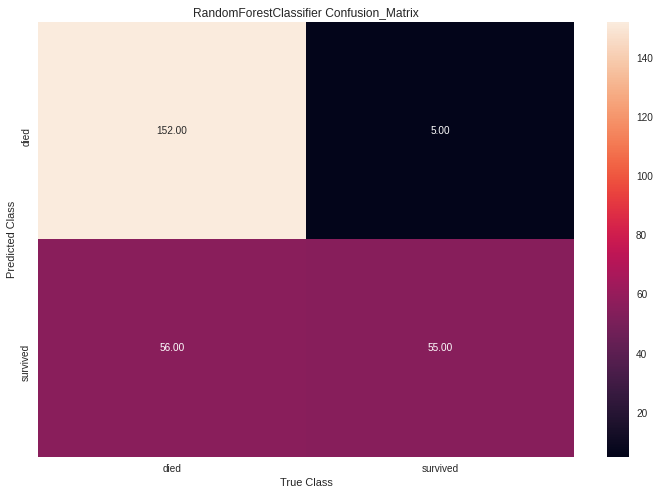

In [111]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt=".2f",xticklabels=['died','survived'],yticklabels=['died','survived'])
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.title('RandomForestClassifier Confusion_Matrix')

## yellowbrick confusion matrix plot

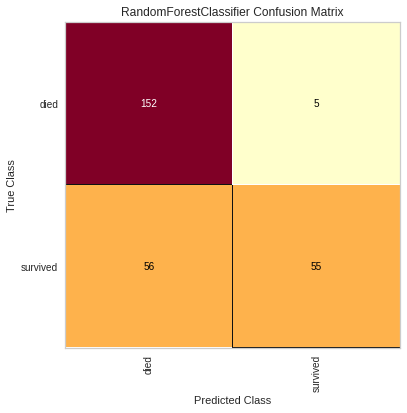

In [110]:
mapping = {0: "died", 1: "survived"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    rf5,
    classes=["died", "survived"],
    label_encoder=mapping,
)
cm_viz.score(X_test, y_test)
cm_viz.poof()

## Prediction on test data

In [112]:
y_pred = rf5.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7318241808687669

## Yellowbricks ROCAUC plot

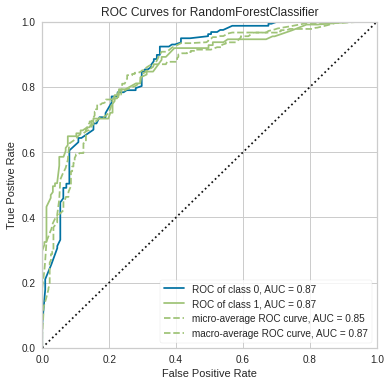

In [113]:
fig, ax = plt.subplots(figsize=(6, 6))
roc_viz = ROCAUC(rf5)
roc_viz.score(X_test, y_test)
roc_viz.poof()
#fig.savefig("images/mlpr_0305.png")

## Plot Learning Curve - Yellowbricks

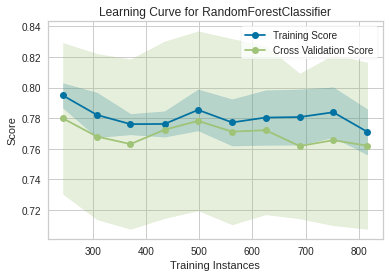

In [114]:
import numpy as np
fig, ax = plt.subplots(figsize=(6, 4))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(
    rf5,
    cv=cv,
    train_sizes=sizes,
    scoring="f1_weighted",
    n_jobs=4,
    ax=ax,
)
lc_viz.fit(X, y)
lc_viz.poof()

## Save and load the saved model

In [115]:
import pickle
pic = pickle.dumps(rf5)
rf6 = pickle.loads(pic)
y_pred = rf6.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7318241808687669